<a href="https://colab.research.google.com/github/Udhbhav99/Customer_convertion/blob/main/Insurance_customer_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
pip install imblearn

In [8]:
import numpy as np

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Importing training data to a dataframe from csv

In [10]:
df=pd.read_csv('train.csv')

getting the shape of the dataframe

In [11]:
df.shape

(45211, 11)

we can see that the df has 11 columns and 45211 rows


In [12]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## Analysing the data

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [14]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


basic stats of the given data

to see the type of data i.e, Balanced or Imbalanced we check the 'y' that shows the status of the consumer if yes or no

In [15]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

it is an unbalanced dataset

In [16]:
print("yes percentage: ",5289*100/(39922+5289))
print("no percentage: ",39922*100/(39922+5289))

yes percentage:  11.698480458295547
no percentage:  88.30151954170445


88.6 percent have not converted and 11.7 percent have converted

# Data preprocessing

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null values to be processed

In [18]:
df.duplicated().sum()

6

In [19]:
df=df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

duplicates removed

In [21]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

# Unique values from catagorical columns

from the above data we can see that there is catagorical data in job, marital,education,calltype, mon,prev outcome and y columns

In [22]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [23]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [24]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [25]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [26]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [27]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [28]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

# Cleaning

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [30]:
df.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [31]:
df.age.isna().sum()

0

no null values in age column

In [32]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [33]:
df.job=df.job.replace('unknown','blue-collar')

In [34]:
df.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

replaced unknown values with mode

In [35]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

nothing to replace

In [36]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

replacing unknown with mode


In [37]:
df.education_qual=df.education_qual.replace('unknown','secondary')

In [38]:
df.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

Unknown values from ed qualificatins replaced

In [39]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [40]:
print('unknown percentage: ',13017*100/(29282+2906+13017))

unknown percentage:  28.795487224864505


around 29 percent of the values are unknown hence we will keep unknown as it is

In [41]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [42]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

since the value of unknowns is high we will leave as it is

## OUTLIER detection and correction


In [43]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [44]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [45]:
q3=df.age.quantile(0.75)
q1=df.age.quantile(0.25)
iqr=q3-q1
u_tres=q3+(1.5*iqr)
l_tres=q1-(1.5*iqr)
df.age=df.age.clip(l_tres,u_tres)


In [46]:
df.age.describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

we can see max has been clipped to 70

In [47]:
df.day.describe()

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64

In [48]:
q3=df.day.quantile(0.75)
q1=df.day.quantile(0.25)
iqr=q3-q1
u_tres=q3+(1.5*iqr)
l_tres=q1-(1.5*iqr)
print(l_tres,u_tres)

-11.5 40.5


no outliers in day

In [49]:
df.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [50]:
q3=df.dur.quantile(0.75)
q1=df.dur.quantile(0.25)
iqr=q3-q1
u_tres=q3+(1.5*iqr)
l_tres=q1-(1.5*iqr)
df.dur=df.dur.clip(l_tres,u_tres)

In [51]:
df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

we see the max value being clipped

In [52]:
df.num_calls.describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [53]:
q3=df.num_calls.quantile(0.75)
q1=df.num_calls.quantile(0.25)
iqr=q3-q1
u_tres=q3+(1.5*iqr)
l_tres=q1-(1.5*iqr)
df.num_calls=df.num_calls.clip(l_tres,u_tres)

In [54]:
df.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

## EDA
we will now explore the data to see what may be the important features

In [55]:
df['target']=df['y'].copy()
df.target.describe()

count     45205
unique        2
top          no
freq      39916
Name: target, dtype: object

In [56]:
df.target.value_counts()

no     39916
yes     5289
Name: target, dtype: int64

In [57]:
df.target=df.target.map({'yes':1,'no':0})

In [58]:
df.target.value_counts()

0    39916
1     5289
Name: target, dtype: int64

In [59]:
cat=df.select_dtypes(include=['object']).columns

In [60]:
cat

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

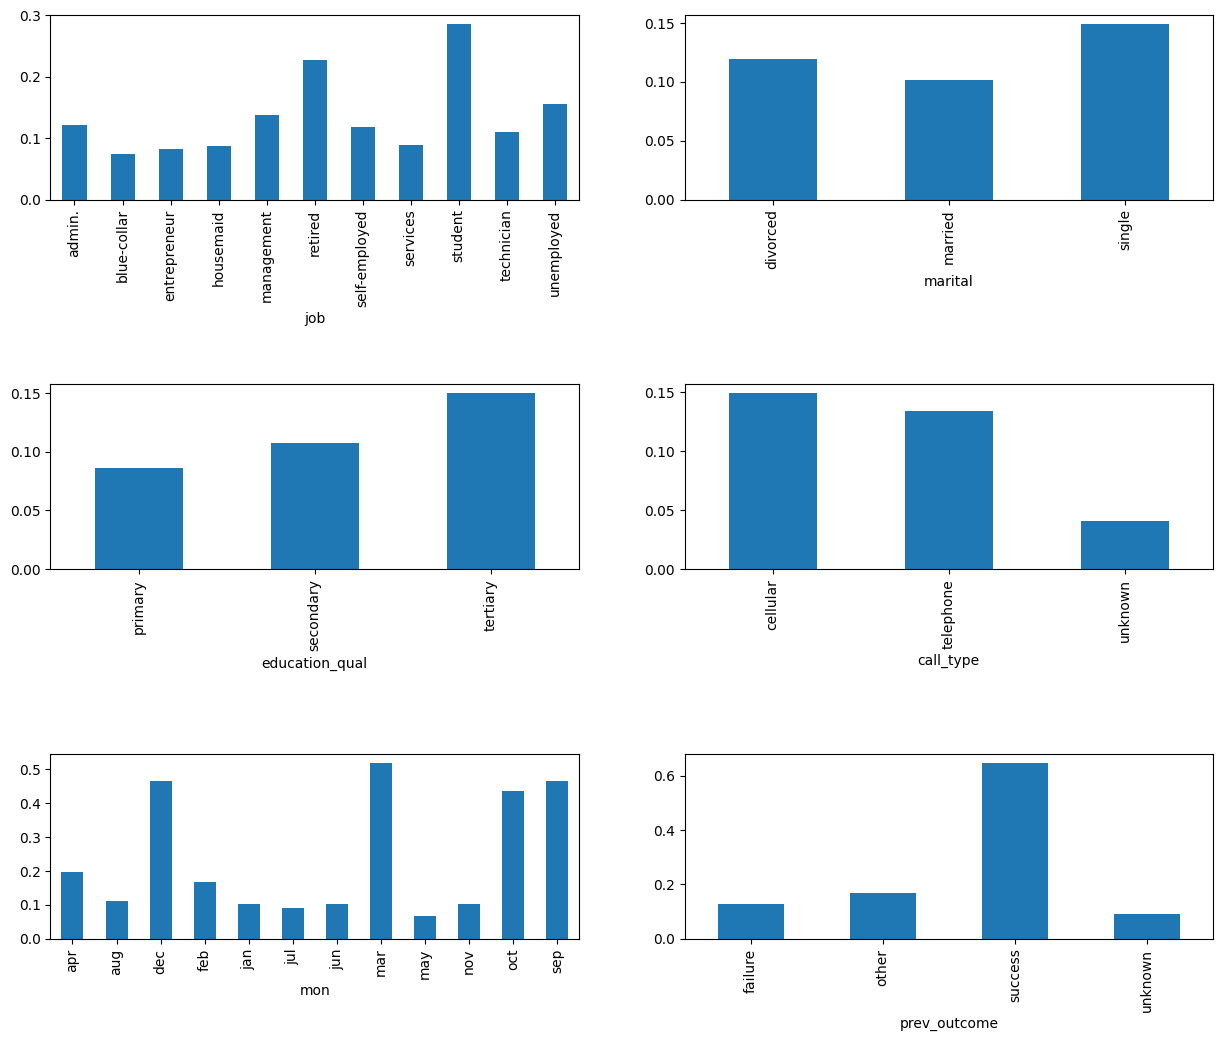

In [61]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=1)
for n,col in enumerate(cat):
    if n<6:
        ax=plt.subplot(3,2,n+1)
        df.groupby(col)['target'].mean().plot(kind='bar',ax=ax)
        ax.set_xlabel(col)
    else:
        pass


##### Obesrvations
in job feature:
student and retired are the highest and blue collar is the lowest

feature- marital status
single highest and married lowest
marital doesnt seem to influence the coversion by a huge margin hence can be dropped as a feature

feature- education
highest-tertiary
lowest-primary

feature- call type
highest-unknown
lowest-cellular

feature- mon
highest-march
lowest-may
feature- prev_outcome
high-success
low-unknown


<Axes: xlabel='target', ylabel='age'>

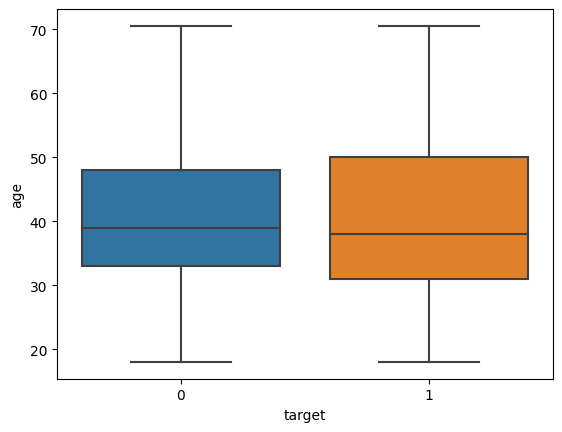

In [62]:
#for continuous features
sns.boxplot(x='target',y='age',data=df)

we observe a difference in the feature hence we will be considering age


<Axes: xlabel='target', ylabel='day'>

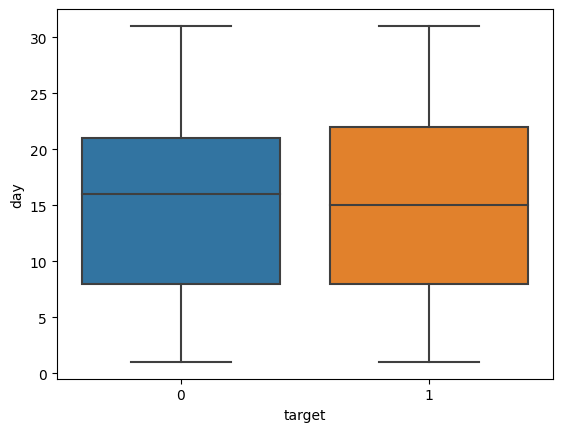

In [63]:
#day
sns.boxplot(x='target',y='day',data=df)

<Axes: xlabel='target', ylabel='dur'>

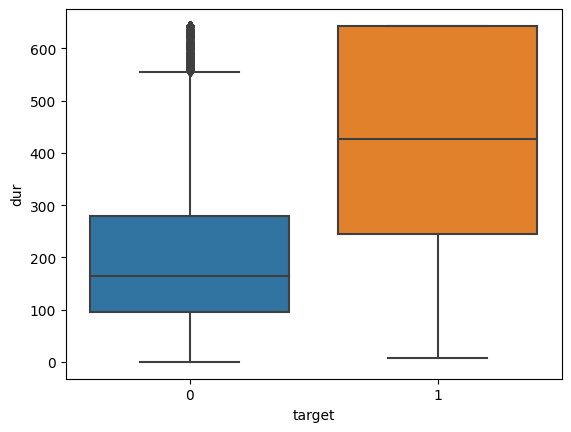

In [64]:
sns.boxplot(x='target',y='dur',data=df)

very evident difference hance this feature will also be considered.

<Axes: xlabel='target', ylabel='num_calls'>

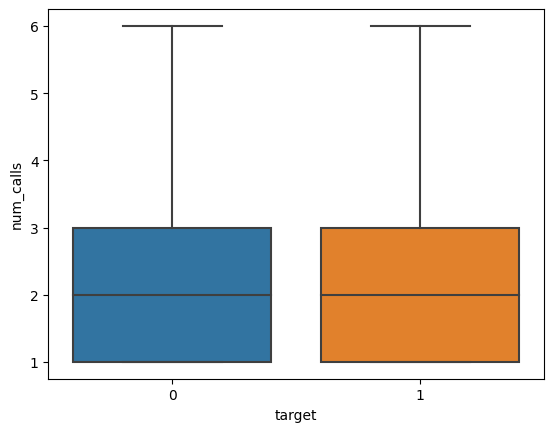

In [65]:
#num_calls
sns.boxplot(x='target',y='num_calls',data=df)

number of calls may not be considered as they are similar

# Encoding

In [66]:
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'self-employed':6,'admin.':7,'management':8, 'unemployed':9, 'retired': 10, 'student' : 11})



In [67]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44.0,5,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33.0,2,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47.0,1,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33.0,1,single,secondary,unknown,5,may,198,1,unknown,no,0


In [68]:
#marital
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
#education
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' :3})
# month
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
#call type
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
#previous outcome
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})


In [69]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,8,1,3,1,5,1,261,1,1,no,0
1,44.0,5,3,2,1,5,1,151,1,1,no,0
2,33.0,2,1,2,1,5,1,76,1,1,no,0
3,47.0,1,1,2,1,5,1,92,1,1,no,0
4,33.0,1,3,2,1,5,1,198,1,1,no,0


In [70]:
df.dtypes

age               float64
job                 int64
marital             int64
education_qual      int64
call_type           int64
day                 int64
mon                 int64
dur                 int64
num_calls           int64
prev_outcome        int64
y                  object
target              int64
dtype: object

In [71]:
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['target'].values

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

as we have established that it is imbalanced data we will balance it

In [77]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

scaling


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# LOGISTIC REGRESSION

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train_smt)
print(f'Test data accuracy is : {lr.score(x_test_scaled, y_test)}, {f1_score(y_test, lr.predict(x_test_scaled))}')


Test data accuracy is : 0.7782324964052649, 0.488128669900434


LR is giving an F1 score is 0.48

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

for k in [1,2,3,4,5,6,7,8,9,10,12,13, 14, 15,16,17, 18, 19, 20,25,30,50]:
  knn = KNeighborsClassifier(k)
  knn.fit(x_train_scaled, y_train_smt)
  train_score = knn.score(x_train_scaled, y_train_smt)
  knn = KNeighborsClassifier(k)
  cross_val_result = np.mean(cross_val_score(knn, x_test_scaled, y_test, cv = 10))
  print(f'K : {k}, training score : {train_score} and cross-val score : {cross_val_result}')


KNeighborsClassifier()


K : 1, training score : 1.0 and cross-val score : 0.873352564415978
K : 2, training score : 0.9945377080222861 and cross-val score : 0.8895027624309393
K : 3, training score : 0.9771676195331561 and cross-val score : 0.8872902508189509
K : 4, training score : 0.977112996613379 and cross-val score : 0.8906085904268324
K : 5, training score : 0.966461527256837 and cross-val score : 0.8914934239475871
K : 6, training score : 0.9664979425366884 and cross-val score : 0.8937054466337457
K : 7, training score : 0.9600888532828374 and cross-val score : 0.8944790495281867
K : 8, training score : 0.958850733767889 and cross-val score : 0.8944795384540166
K : 9, training score : 0.9547904300644551 and cross-val score : 0.8970230528528822
K : 10, training score : 0.9526783438330724 and cross-val score : 0.8958068498508777
K : 12, training score : 0.9477804886930556 and cross-val score : 0.8934839632327776
K : 13, training score : 0.9456501948217472 and cross-val score : 0.8953642497433141
K : 14, 

KNeighborsClassifier()

we can see that the best cross val score is obtained at k=9


In [84]:
knn = KNeighborsClassifier(9)
knn.fit(x_train_scaled, y_train_smt)
print(f'Test data accuracy is : {knn.score(x_test_scaled, y_test)}, {f1_score(y_test, knn.predict(x_test_scaled))} ')

Test data accuracy is : 0.8131843822585997, 0.5243593353984792 


f1 score for knn is 0.52

## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,13,14,15,16,17,20,30]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(x_train_scaled, y_train_smt)
  train_score = dt.score(x_train_scaled, y_train_smt)
  dt = DecisionTreeClassifier(max_depth = depth)
  cross_val_result = np.mean(cross_val_score(dt, x_train_scaled, y_train_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.7801973708167947 and cross-val score : 0.7801973782695556
Depth : 2, training score : 0.8293033756964422 and cross-val score : 0.8293039581993318
Depth : 3, training score : 0.8681402716579877 and cross-val score : 0.8652819704718541
Depth : 4, training score : 0.8937584210334656 and cross-val score : 0.8859848441153139
Depth : 5, training score : 0.9091074614908415 and cross-val score : 0.9079247619528742
Depth : 6, training score : 0.9202323294854521 and cross-val score : 0.9184126118801272
Depth : 7, training score : 0.9334692837114453 and cross-val score : 0.9296286812229668
Depth : 8, training score : 0.9441571683478388 and cross-val score : 0.9351822103189267
Depth : 9, training score : 0.9539164633480208 and cross-val score : 0.9428477003572977
Depth : 10, training score : 0.9627835839918429 and cross-val score : 0.946671603095723
Depth : 13, training score : 0.9820654746731728 and cross-val score : 0.954228244409325
Depth : 14, training score : 0.9

best cross val at depth 14

In [88]:
dt = DecisionTreeClassifier(max_depth = 14)
dt.fit(x_train_scaled, y_train_smt)
f'Test data accuracy is : {dt.score(x_test_scaled, y_test)}, {f1_score(y_test, dt.predict(x_test_scaled))} '

'Test data accuracy is : 0.8622939940272094, 0.5720178755586113 '

Decision tree f1 score=0.57

##Voting Classifier

In [89]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators = [('logistic_regression', lr),('k-nn', knn),('decision-tree', dt)])
model.fit(x_train_scaled, y_train_smt)
f'Test data accuracy is : {model.score(x_test_scaled, y_test)}, {f1_score(y_test, model.predict(x_test_scaled))} '

'Test data accuracy is : 0.82789514434244, 0.5479372457873329 '

##Random forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(x_train_scaled, y_train_smt)
  train_score = rf.score(x_train_scaled, y_train_smt)
  cross_val_result = np.mean(cross_val_score(rf, x_test_scaled, y_test, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.8311787626087906 and cross-val score : 0.8817608663765707
Depth : 2, training score : 0.8685226320964277 and cross-val score : 0.8862957756808292
Depth : 3, training score : 0.9077965114161902 and cross-val score : 0.8924893658631985
Depth : 4, training score : 0.9253304686646517 and cross-val score : 0.8974672419693933
Depth : 5, training score : 0.9345253268271366 and cross-val score : 0.8996793868870092
Depth : 6, training score : 0.9422635737955646 and cross-val score : 0.9007854593458173
Depth : 7, training score : 0.9496376679654783 and cross-val score : 0.9029972375690607
Depth : 8, training score : 0.9550271293834893 and cross-val score : 0.9044349239720335
Depth : 9, training score : 0.9615454644768945 and cross-val score : 0.9036603432259327
Depth : 10, training score : 0.9679909690105969 and cross-val score : 0.9041035544907837
Depth : 12, training score : 0.9788063071264703 and cross-val score : 0.902554637461497
Depth : 15, training score : 0.

max depth 8 gives best cross val score

In [93]:
rf = RandomForestClassifier(max_depth = 8)
rf.fit(x_train_scaled, y_train_smt)
f'Test data accuracy is : {rf.score(x_test_scaled, y_test)}, {f1_score(y_test, rf.predict(x_test_scaled))} '

'Test data accuracy is : 0.8379604026103307, 0.557802595834591 '

f1 score for random forest is 0.55

##Xgboost

In [97]:
import xgboost as xgb

for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(x_train_scaled, y_train_smt)
  train_score = xg.score(x_train_scaled, y_train_smt)
  cross_val_result = np.mean(cross_val_score(xg, x_test_scaled, y_test, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.5611958777903209 and cross-val score : 0.8817608663765707
Learning Rate : 0.002, training score : 0.9096718983285387 and cross-val score : 0.8817608663765707
Learning Rate : 0.005, training score : 0.9302829467244456 and cross-val score : 0.8817608663765707
Learning Rate : 0.01, training score : 0.9383671388514621 and cross-val score : 0.8948123747127561
Learning Rate : 0.02, training score : 0.9505298423218382 and cross-val score : 0.9012281816848384
Learning Rate : 0.03, training score : 0.9577582753723463 and cross-val score : 0.9034399599080819
Learning Rate : 0.04, training score : 0.9626925457922144 and cross-val score : 0.9047673935364005
Learning Rate : 0.05, training score : 0.9663704890572085 and cross-val score : 0.9049886324744536
Learning Rate : 0.06, training score : 0.9699756017624995 and cross-val score : 0.9060936048501442
Learning Rate : 0.07, training score : 0.9725064637121736 and cross-val score : 0.9058728548379211
Learnin

In [98]:
xg = xgb.XGBClassifier(learning_rate=0.05)
xg.fit(x_train_scaled, y_train_smt)
f'Test data accuracy is : {xg.score(x_test_scaled, y_test)}, {f1_score(y_test, xg.predict(x_test_scaled))} '

'Test data accuracy is : 0.863178851896914, 0.5864259445001672 '

f1 scores

lr=0.48

knn=0.52

decision tree=0.57

random forest=0.55

xgboost=0.58

hence the best approach should be xgboost


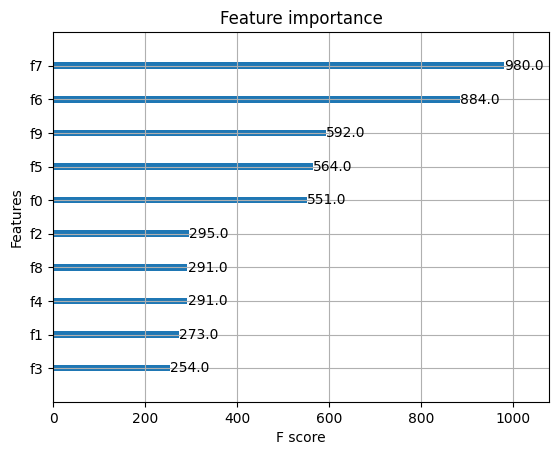

In [101]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xg)
plt.show()

In [105]:
for x,y in enumerate(df.columns):
  if x<10:
    print('f'+str(x)+'='+y)

f0=age
f1=job
f2=marital
f3=education_qual
f4=call_type
f5=day
f6=mon
f7=dur
f8=num_calls
f9=prev_outcome


Least important feature is ed qualification
highest is duration of call

the higher time a call occours will play a crucial role in consumer conversion